#####################################################


# 5. Kernels and RKHS


#####################################################

###########################

## Answer 5 (a)

###########################

In [3]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel as lk
import matplotlib.pyplot as plt

In [194]:
# defined input space
X1 = np.linspace(-1,1,10).reshape(-1,1)
#X1.shape
#X1[0:]

In [195]:
def linear_kernel (X,X1):
    lk = np.dot(X,X1)
    return lk

In [196]:
'''
k = linear_kernel (1,X1)
print(k)
plt.plot(X1,k)
plt.show()

#############################

def gram_mat (X,X1):
    K= []
    m = X.shape[0]
    for i in range(m):
        K = np.append(K,np.dot (X[i,0],X1))
    K=K.reshape(X.shape[0],X1.shape[0])
    return K  
K = gram_mat (X1,X1)
plt.matshow(K)
K[0,:]

'''

'\nk = linear_kernel (1,X1)\nprint(k)\nplt.plot(X1,k)\nplt.show()\n\n#############################\n\ndef gram_mat (X,X1):\n    K= []\n    m = X.shape[0]\n    for i in range(m):\n        K = np.append(K,np.dot (X[i,0],X1))\n    K=K.reshape(X.shape[0],X1.shape[0])\n    return K  \nK = gram_mat (X1,X1)\nplt.matshow(K)\nK[0,:]\n\n'

In [197]:
k =  linear_kernel (1,X1)
k_func1 = 3 * k
k_func2 = 3 * k + 4
k_func3 = 3 * k + 4 * k

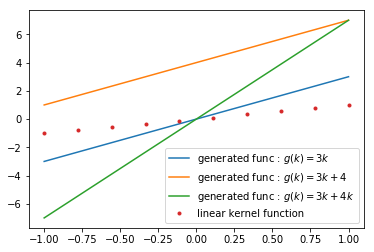

In [198]:
plt.plot(X1,k_func1,label='generated func : $ g(k) = 3k $')
plt.plot(X1,k_func2,label='generated func : $ g(k) = 3k+4 $')
plt.plot(X1,k_func3,label='generated func : $ g(k) = 3k+4k $')
plt.plot(X1,k,'.',label = 'linear kernel function')
plt.legend()
plt.show()

$||f||_{k}$

$||f||^2_k = <f,f>_k = <k_w,k_w>_k = k(w,w)$

function 1:
   $ k_1(w,w) = 3 k(w,w) = 3 w^2  < \infty $
    
function 2:
   $ k_2(w,w) = 3 k(w,w)+4 = 3 w^2 +4 < \infty $
    
function 3:
   $ k_3(w,w) = 3 k(w,w)+4 k(w,w) = 3 w^2 + 4 w^2 < \infty$
    

##################################

## Answer 5 (b)

###################################

In [44]:
def gaussian_kernel (X,X1,p):
    gk = np.exp (-1 *( (X-X1)**2 ) / (2*(p**2) ) )
    return gk

In [52]:
'''
for i in range(X1.shape[0]):
    k = gaussian_kernel (X1[i,0],X1,p[0,1])
    plt.plot(k)
'''  

'\nfor i in range(X1.shape[0]):\n    k = gaussian_kernel (X1[i,0],X1,p[0,1])\n    plt.plot(k)\n'

### For each bandwidth $\rho \in \{ 0.1, 0.5, 1 \} $ function hase been generated

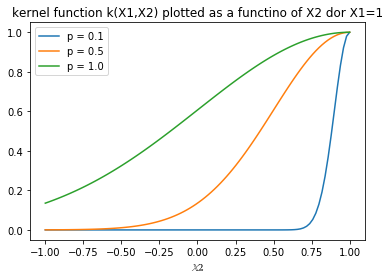

In [210]:
# given
p = np.matrix([0.1,0.5,1])

# defined input space for given limit X = [-1,1]
X1 = np.linspace(-1,1,100).reshape(-1,1)
X2 = X1

for i in range(p.shape[1]):
    k = gaussian_kernel (X1[-1,0],X2,p[0,i])
    plt.plot(X1,k , label = 'p = %s'%p[0,i])
plt.xlabel('$\mathbb{X2}$')
plt.title('kernel function k(X1,X2) plotted as a functino of X2 dor X1=1')
plt.legend()
plt.show()

### We're approximating the feature mapping  $\phi(.)$ using taylor series expansion up to d=150 features

$\gamma = \frac{1}{2 \sigma^2}$
\begin{align}
    e^{- \gamma ||x_i - x_j ||} = & e^{- \gamma(x_i-x_j)^2} = e^{-\gamma x_i^2 + 2\gamma x_i x_j-\gamma x_j^2}  \\
                                = & e^{-\gamma x_i^2 \gamma x_j^2} \Bigg(1 \times 1 + \sqrt{\frac{2\gamma}{1!}}x_i \times \sqrt{\frac{2\gamma}{1!}}x_j + \sqrt{\frac{(2\gamma)^2}{2!}}x_i^2 \times \sqrt{\frac{(2\gamma)^2}{2!}}x_j^2 \nonumber \\ & + \sqrt{\frac{(2\gamma)^3}{3!}}x_i^3 \times \sqrt{\frac{(2\gamma)^3}{3!}}x_j^3 + .......  \Bigg) \\
                                = & \phi(x_i)^T\phi(x_j)
\end{align}
here $\phi(x) = e^{-\gamma x^2} \Bigg[ 1, \sqrt{\frac{(2\gamma)^1}{1!}}x^1 , \sqrt{\frac{(2\gamma)^2}{2!}}x^2 ..... \sqrt{\frac{(2\gamma)^{150} }{150!}}x^{150} \Bigg]^T$

### ploting gaussian basis function $\phi(x_i)$, where $x_i$  = 1

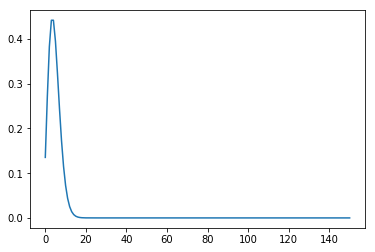

In [218]:
def gaussian_basis(x,p,d):
    gamma = 1/(2*(p**2))
    g = np.matrix(np.zeros([d+1,1]))
    for i in range(d+1):
        from scipy.special import factorial
        g[i,0] = np.sqrt(((2*gamma)**i)/factorial(i, exact=True))*(x**i)
    g_basis = np.exp(-gamma*(x)**2)*g
    return g_basis

d = 150
g_basis=gaussian_basis(X1[-1,0],p[0,1],d) #gaussian basis for Xi = 1
plt.plot(g_basis)

### Plotting function for fixed $\rho$=0.5

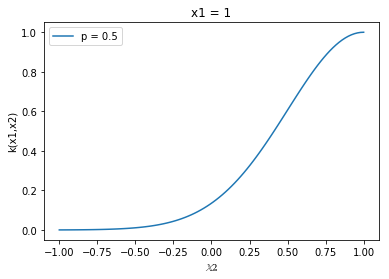

In [283]:
d = 150
x1=X1[-1,0]
g_basis1=gaussian_basis(x1,p[0,1],d) # for fixed p=0.5, X1=1 

func = np.matrix(np.zeros([X1.shape[0],1]))
for k in range(X1.shape[0]):
    x2 = X2[k,0]
    g_basis2=gaussian_basis(x2,p[0,1],d) # for fixed p
    func[k,:]=np.dot(g_basis1.T,g_basis2)
plt.plot(X1,func,label='p = %s'%p[0,1])
plt.xlabel('$\mathbb{X2}$')
plt.ylabel('k(x1,x2)')
plt.title('x1 = 1')
plt.legend()
plt.show()

### ploting functions for $\rho \in \{ 0.1, 0.5, 1 \} $

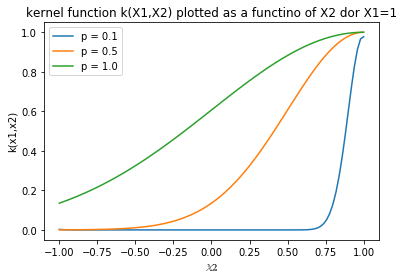

In [285]:
x1=X1[-1,0]
d = 120

# evaluate kernel funciton for different bandwidth
for m in range (p.shape[1]):
    g_basis1=gaussian_basis(x1,p[0,m],d) 
    func = np.matrix(np.zeros([X1.shape[0],1]))
    
    # get kernel function as a function of X2 (when bandwidth P and X1 fixed)
    for k in range(X1.shape[0]):
        x2 = X2[k,0]
        g_basis2=gaussian_basis(x2,p[0,m],d) 
        func[k,:]=np.dot(g_basis1.T,g_basis2)
    plt.plot(X1,func,label='p = %s'%p[0,m])
    plt.xlabel('$\mathbb{X2}$')
    plt.ylabel('k(x1,x2)')
    plt.title('kernel function k(X1,X2) plotted as a functino of X2 dor X1=1')
    plt.legend()
plt.show()

## Answer 5(c)

In [228]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor

In [308]:
df1 = pd.read_csv('hw1-q5x.csv',delim_whitespace =True,header=None,dtype=np.float)
df2 = pd.read_csv('hw1-q5y.csv',delim_whitespace =True,header=None,dtype=np.float)
Data=pd.concat([df1,df2],axis=1)
Data.columns=['X','Y']
no_data = df1.shape[0]# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

In [309]:
X_train = df1.values
y_train = df2.values.reshape(-1)

In [279]:
X_train.reshape(-1).shape

(10,)

In [246]:
# Instanciate a Gaussian Process model
GaussianProcessRegressor.fit(X_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
sample_y(X, n_samples=1, random_state=0

In [272]:

from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)

In [275]:
y.shape

(500,)

In [ ]:
w = np.linalg.inv((phi.T*phi)+lmbda*I) * (phi.T * y)

In [263]:
x = np.array( [ [1,2,3],[2,4,4] ] )

In [265]:
x

array([[1, 2, 3],
       [2, 4, 4]])

In [282]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

gpr = GaussianProcessRegressor.fit(X_train, y_train)


TypeError: fit() missing 1 required positional argument: 'y'

In [271]:
kernel

1**2 * RBF(length_scale=10)

In [289]:
X_train.shape

(10, 1)

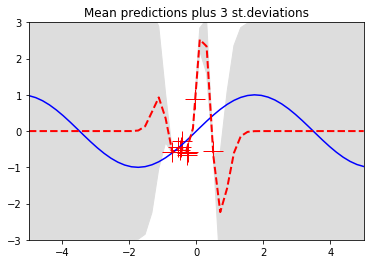

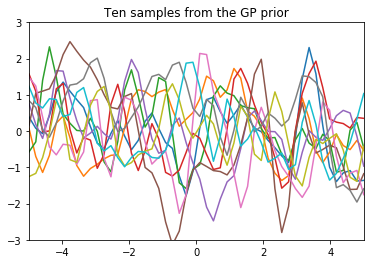

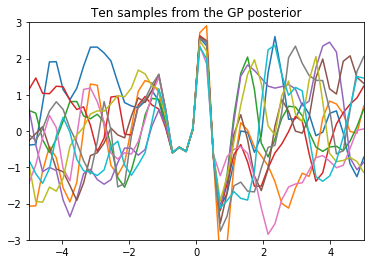

In [334]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = X_train
y = y_train

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()

In [295]:
def kernel_func( X1, X2, l=1.0, sigma_f=1.0 ,lmbda ):
    ''' Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2. Args: X1: Array of m points (m x d). X2: Array of n points (n x d). Returns: Covariance matrix (m x n). '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return (sigma_f**2/lmbda) * np.exp(-0.5 / l**2 * sqdist)

SyntaxError: non-default argument follows default argument (<ipython-input-295-27ba8125d4a0>, line 1)

In [325]:
 K = kernel(X_train, X_train, l, sigma_f ,lmbda) + sigma_y**2 * np.eye(len(X_train))

In [327]:
K.shape

(10, 10)

In [329]:
import numpy as np
l = 1.0
sigma_f = 1.0
def kernel(X1, X2, l, sigma_f ,lmbda ):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return (sigma_f**2/lmbda) * np.exp(-0.5 / l**2 * sqdist)

In [330]:
from numpy.linalg import inv
l=1.0
sigma_f=1.0
sigma_y=1e-8
def posterior_predictive(X_s, X_train, Y_train, l, sigma_f, sigma_y, lmbda):
    ''' Computes the suffifient statistics of the GP posterior predictive distribution from m training data X_train and Y_train and n new inputs X_s. Args: X_s: New input locations (n x d). X_train: Training locations (m x d). Y_train: Training targets (m x 1). l: Kernel length parameter. sigma_f: Kernel vertical variation parameter. sigma_y: Noise parameter. Returns: Posterior mean vector (n x d) and covariance matrix (n x n). '''
    K = kernel(X_train, X_train, l, sigma_f ,lmbda) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f,lmbda)
    K_ss = kernel(X_s, X_s, l, sigma_f,lmbda) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

In [331]:

X = np.linspace(-1,1,10).reshape(-1,1)

In [332]:

lmbda = 1
# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train,l, sigma_f, sigma_y, lmbda)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

LinAlgError: Singular matrix